<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Data Science and AI
## Lab 7.1.1: Decision Trees

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.6895
    - **ROC AUC**  = 0.5690
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.
Is this guy going to donate blood in march 2007 or not
## Actual Question
Choose the **one** question that should be answered.
Is this guy going to donate blood in march 2007 or not

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh
        Department of Information Management
        Chung-Hua University,
        Hsin Chu, Taiwan 30067, R.O.C.

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper:

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](https://archive.ics.uci.edu/ml/datasets/Blood+Transfusion+Service+Center) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler

In [3]:
location = r"D:\Download\DataScience\Files\Week061123_DecisionTree_Ensemble\Module 7\blood+transfusion+service+center\transfusion.data"
df = pd.read_csv(location)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
df.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [37]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [5]:
# Checking number of features with shape. As per below, it has 5 columns (features) and 748 rows (observations)
df.shape

(748, 5)

In [6]:
# Checking the data types
df.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [7]:
# Not sure if I understand this but if domain in this context means all possible values that the features can have, 
# and intervals meaning distributions of values within the domain then:

for col in df.columns:
    temp_df = df[col].value_counts()
    temp_df.columns = ['value', 'quantity']
    print(f"Counts for {col}:\n{temp_df}\n")

Counts for Recency (months):
2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
8       6
12      6
6       5
13      5
0       5
10      3
38      2
18      2
15      2
22      1
26      1
35      1
40      1
74      1
20      1
17      1
25      1
39      1
72      1
Name: Recency (months), dtype: int64

Counts for Frequency (times):
1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
12     14
10     14
14     13
16     13
13      9
15      6
17      4
24      3
21      2
19      2
20      2
22      2
34      1
41      1
26      1
44      1
50      1
43      1
38      1
18      1
23      1
46      1
33      1
Name: Frequency (times), dtype: int64

Counts for Monetary (c.c. blood):
250      158
500      112
750       87
1000      62
1250      62
1500      52
1750      43
2000      31
2250      24
2750      22
3000      14
2500      14
3500      13
4000      13
3250    

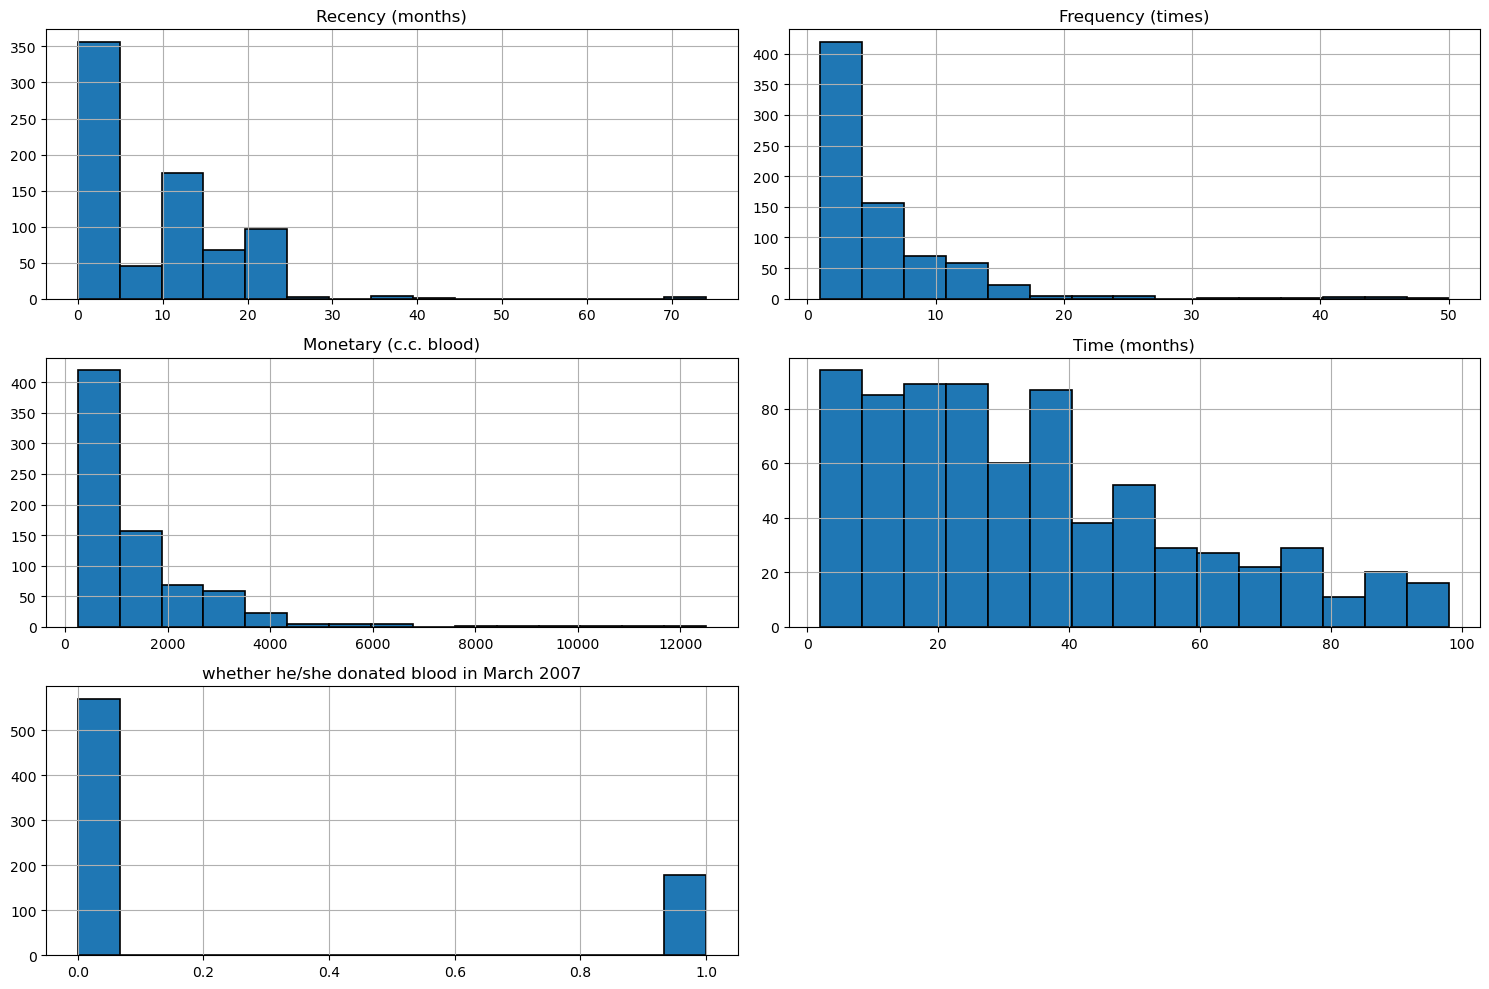

In [8]:
df.hist(bins=15, figsize=(15,10), layout=(3,2), edgecolor='black', linewidth=1.2)
plt.tight_layout()
plt.show()

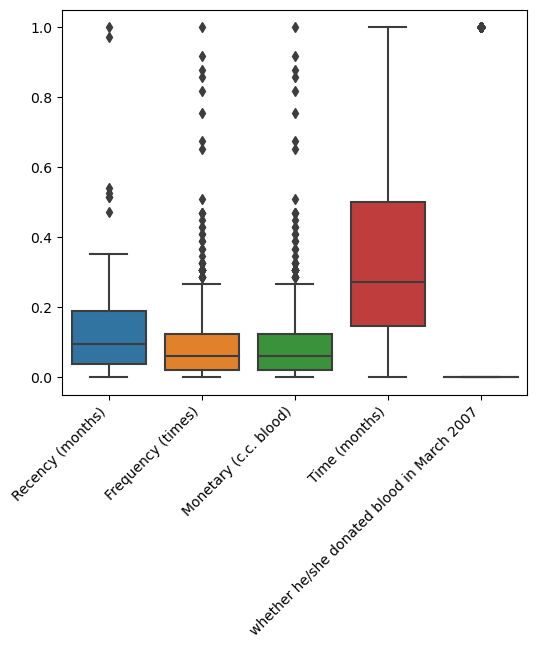

In [38]:
# Checking outliers now and scaling the dataframe so a more meaningful comparison can be drawn for each column
scaler = MinMaxScaler()
df_scaled_BP = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

plt.figure(figsize = (6,5))
sns.boxplot(data=df_scaled_BP)
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [39]:
# Checking the amount of outliers as percentage of total data
for col in df.columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Calculate Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Determine outliers using IQR
    outliers = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))

    # Calculate the percentage of outliers
    outliers_percent = 100 * outliers.sum() / len(df)

    print(f"{col} has {outliers.sum()} outliers, which is {outliers_percent:.2f}% of the data")

Recency (months) has 7 outliers, which is 0.94% of the data
Frequency (times) has 45 outliers, which is 6.02% of the data
Monetary (c.c. blood) has 45 outliers, which is 6.02% of the data
Time (months) has 0 outliers, which is 0.00% of the data
whether he/she donated blood in March 2007 has 178 outliers, which is 23.80% of the data


In [40]:
# Checking null value
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [42]:
# Checking coded content:
# Have already checked for every unique value on each column on the step for checking domain and interval
# Looks like the data doesn't have anything like that

# from value_counts() and dtypes, I don't seem to see any coded content here, but I've ticked off the rest of the EDA process

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [43]:
# For outliers, the approach I will use is to store dataframe with and without outliers
# Then whichever gives higher accuracy will be used

df_no_outlier = df.copy()

for col in df_no_outlier.columns:
    # Excluding the target column from outlier removal because that would make all target as whatever is the majority
    if col!= 'whether he/she donated blood in March 2007':    
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df_no_outlier[col].quantile(0.25)
        Q3 = df_no_outlier[col].quantile(0.75)

        # Calculate Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Determine non-outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter the DataFrame to keep only non-outliers
        df_no_outlier = df_no_outlier[(df_no_outlier[col] >= lower_bound) & (df_no_outlier[col] <= upper_bound)]

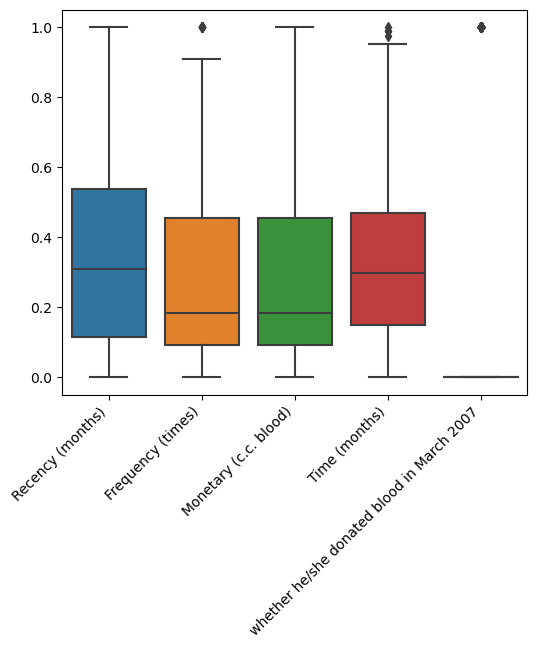

In [44]:
df_no_outlier_scaled_BP = pd.DataFrame(scaler.fit_transform(df_no_outlier), columns = df_no_outlier.columns)
plt.figure(figsize = (6,5))
sns.boxplot(data=df_no_outlier_scaled_BP)
plt.xticks(rotation=45, ha = 'right')
plt.show()

In [45]:
# There's no null/missing value/coded content that can be seen so far. Only Normalisation and Feature engineering task left now

# As far as feature engineering goes, given that there's only 5 columns and it looks quite straight forward,
# the only thing I can think of is just to shorten the target variable's column name

list_of_df = [df, df_no_outlier]

for df_iteration in list_of_df:
    df_iteration.rename(columns={'whether he/she donated blood in March 2007': 'Donated'}, inplace=True)

# For normalization, I have done normalization for my box plot earlier
# But for training the model, I need to scale it after separating it into X and y

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [20]:
# The features are: Recency, Frequency, Monetary, Time
# The output variable is Donated and it's type is binary categorical data
# The type of modelling will be supervised model since we are dealing with labelled data and trying to predict some kind of value
# The type of supervised model is binary classification predicting whether X person donated blood or not

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [46]:
from sklearn.model_selection import train_test_split

# For number of observations, we know from .shape this data has 748 rows (observations) and 5 columns (features)
# Will now define the X and y for train test split as well

# Defining the y
y = df['Donated']
y_no_outlier = df_no_outlier['Donated']

# Defining the X
for df_iter in list_of_df:
    if 'Donated' in df_iter.columns:
        df_iter.drop(columns=['Donated'], inplace = True)

In [51]:
# Creating normalized X
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
df_no_outlier_scaled = pd.DataFrame(scaler.fit_transform(df_no_outlier), columns = df_no_outlier.columns)

# Add it to the list of data frame
list_of_df.append(df_scaled)
list_of_df.append(df_no_outlier_scaled)

In [54]:
# Doing a bunch of quick check whether each Dataframe looks ok or not, specially the dimension
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [55]:
df_scaled

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,0.027027,1.000000,1.000000,1.000000
1,0.000000,0.244898,0.244898,0.270833
2,0.013514,0.306122,0.306122,0.343750
3,0.027027,0.387755,0.387755,0.447917
4,0.013514,0.469388,0.469388,0.781250
...,...,...,...,...
743,0.310811,0.020408,0.020408,0.375000
744,0.283784,0.020408,0.020408,0.520833
745,0.310811,0.040816,0.040816,0.625000
746,0.527027,0.000000,0.000000,0.385417


In [56]:
df_no_outlier

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
5,4,4,1000,4
6,2,7,1750,14
7,1,12,3000,35
8,2,9,2250,22
11,0,3,750,4
...,...,...,...,...
739,23,4,1000,52
740,23,1,250,23
743,23,2,500,38
744,21,2,500,52


In [57]:
df_no_outlier_scaled

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,0.153846,0.272727,0.272727,0.024691
1,0.076923,0.545455,0.545455,0.148148
2,0.038462,1.000000,1.000000,0.407407
3,0.076923,0.727273,0.727273,0.246914
4,0.000000,0.181818,0.181818,0.024691
...,...,...,...,...
650,0.884615,0.272727,0.272727,0.617284
651,0.884615,0.000000,0.000000,0.259259
652,0.884615,0.090909,0.090909,0.444444
653,0.807692,0.090909,0.090909,0.617284


In [58]:
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: Donated, Length: 748, dtype: int64

In [59]:
y_no_outlier

5      0
6      1
7      0
8      1
11     0
      ..
739    0
740    0
743    0
744    0
745    0
Name: Donated, Length: 655, dtype: int64

In [60]:
# Splitting data now
# For defining the split and their proportions, I'll go with the standard 0.2 test and 0.8 train size

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
XS_train, XS_test, _, _ = train_test_split(df_scaled, y, test_size=0.2, random_state=42) 

X_NO_train, X_NO_test, y_NO_train, y_NO_test = train_test_split(df_no_outlier, y_no_outlier, test_size=0.2, random_state=42)
XS_NO_train, XS_NO_test, _, _ = train_test_split(df_no_outlier_scaled, y_no_outlier, test_size=0.2, random_state=42)

# It's a bit messy because I need to have each separate train/test data for comparing evaluation later
# Also the scaled version doesn't need it's own y train and test because it'll be the same as the non-scaled one
# The outlier/non-outlier does need it's own one because the row dimension is different for each

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

clf = DecisionTreeClassifier(random_state=42)

# Step 9: Fit the Model

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [62]:
# I combine step 9, 10 and 11 because I need to run a function
# This is to avoid repeating myself for each X and y version (outlier/no outlier/scaled/non scaled)
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': ['sqrt', 'log2', None],
}

grid_search_acc = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search_auc = GridSearchCV(clf, param_grid, cv=5, scoring='roc_auc')

In [64]:
def evaluate_model(model_name, X_train, y_train, X_test, y_test):
    print(f"Evaluating model: {model_name}") 
    
    # Perform grid search with accuracy
    grid_search_acc.fit(X_train, y_train)
    best_clf_acc = grid_search_acc.best_estimator_
    
     # Perform grid search with ROC AUC
    grid_search_auc.fit(X_train, y_train)
    best_clf_auc = grid_search_auc.best_estimator_
    
    # Predictions and scoring on the training set
    y_pred_train_acc = best_clf_acc.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_pred_train_acc)
    print(f'Training Accuracy: {train_accuracy:.3f}')
    
     # Scoring on the training set
    y_probs_train_auc = best_clf_auc.predict_proba(X_train)[:, 1]
    train_roc_auc = roc_auc_score(y_train, y_probs_train_auc)
    print(f'Training ROC-AUC: {train_roc_auc:.3f}')
    
    # Predictions and scoring on the test set
    y_pred_test_acc = best_clf_acc.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred_test_acc)
    print(f'Test Accuracy: {test_accuracy:.3f}')
    
    # Scoring on the test set
    y_probs_test_auc = best_clf_auc.predict_proba(X_test)[:, 1]
    test_roc_auc = roc_auc_score(y_test, y_probs_test_auc)
    print(f'Test ROC-AUC: {test_roc_auc:.3f}')
    
    print('')

# Now evaluate each dataset version using both the training and test data
evaluate_model('Regular', X_train, y_train, X_test, y_test)
evaluate_model('Scaled', XS_train, y_train, XS_test, y_test)
evaluate_model('No Outliers', X_NO_train, y_NO_train, X_NO_test, y_NO_test)
evaluate_model('Scaled No Outliers', XS_NO_train, y_NO_train, XS_NO_test, y_NO_test)


Evaluating model: Regular
Training Accuracy: 0.821
Training ROC-AUC: 0.878
Test Accuracy: 0.767
Test ROC-AUC: 0.656

Evaluating model: Scaled
Training Accuracy: 0.831
Training ROC-AUC: 0.878
Test Accuracy: 0.780
Test ROC-AUC: 0.656

Evaluating model: No Outliers
Training Accuracy: 0.823
Training ROC-AUC: 0.878
Test Accuracy: 0.763
Test ROC-AUC: 0.664

Evaluating model: Scaled No Outliers
Training Accuracy: 0.823
Training ROC-AUC: 0.878
Test Accuracy: 0.763
Test ROC-AUC: 0.666



# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [66]:
# The problem listed on step 1 was to predict "Is this guy going to donate blood in march 2007 or not"
# From the result above, we know the best performing one is scaled with no outliers
# I will use that model and write a function which takes in parameters for predicting whether someone will donate or not
# This will fall into category as product/process

grid_search_acc = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', refit=True)
grid_search_acc.fit(XS_NO_train, y_NO_train)
best_model_acc = grid_search_acc.best_estimator_

In [68]:
def predict_donation(Recency, Frequency, Monetary, Time):
    features = np.array([[Recency, Frequency, Monetary, Time]])
    features_scaled = scaler.transform(features)
    
    prediction = best_model_acc.predict(features_scaled)
    
    # Return a message based on the prediction
    if prediction == 1:
        return "This person will donate blood."
    else:
        return "This person will not donate blood."

predict_donation(2, 7, 1750, 14)

D:\Program\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
D:\Program\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


'This person will donate blood.'



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



